In [21]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor, AdaBoostRegressor
from sklearn.svm import SVR
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error
from sklearn.model_selection import RandomizedSearchCV
from catboost import CatBoostRegressor
from xgboost import XGBRegressor
import warnings

In [22]:
df = pd.read_csv('/Users/anushaphullathi/Downloads/MlopsUsingAzureAWS/notebook/data/studind.csv')

In [23]:
df.head()

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
0,female,group B,bachelor's degree,standard,none,72,72,74
1,female,group C,some college,standard,completed,69,90,88
2,female,group B,master's degree,standard,none,90,95,93
3,male,group A,associate's degree,free/reduced,none,47,57,44
4,male,group C,some college,standard,none,76,78,75


In [24]:
X = df.drop(columns=['math score'], axis=1)
y = df['math score']


In [25]:
X.head()

,gender,race/ethnicity,parental level of education,lunch,test preparation course,reading score,writing score
0,female,group B,bachelor's degree,standard,none,72,74
1,female,group C,some college,standard,completed,90,88
2,female,group B,master's degree,standard,none,95,93
3,male,group A,associate's degree,free/reduced,none,57,44
4,male,group C,some college,standard,none,78,75


In [26]:
y.head()

0    72
1    69
2    90
3    47
4    76
Name: math score, dtype: int64

In [30]:
num_features = X.select_dtypes(exclude='object').columns
cat_features = X.select_dtypes(include='object').columns

from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.compose import ColumnTransformer
oh_transformer = OneHotEncoder()
numeric_transformer = StandardScaler()

preproceser = ColumnTransformer(
    [
        ('OnehotEncoder',oh_transformer, cat_features),
        ('StandardScaler',numeric_transformer, num_features)
    ]
)

In [31]:
print(X.columns)


Index(['gender', 'race/ethnicity', 'parental level of education', 'lunch',
       'test preparation course', 'reading score', 'writing score'],
      dtype='object')


In [32]:
X = preproceser.fit_transform(X)

In [33]:
X

array([[ 1.        ,  0.        ,  0.        , ...,  1.        ,
         0.19399858,  0.39149181],
       [ 1.        ,  0.        ,  0.        , ...,  0.        ,
         1.42747598,  1.31326868],
       [ 1.        ,  0.        ,  0.        , ...,  1.        ,
         1.77010859,  1.64247471],
       ...,
       [ 1.        ,  0.        ,  0.        , ...,  0.        ,
         0.12547206, -0.20107904],
       [ 1.        ,  0.        ,  0.        , ...,  0.        ,
         0.60515772,  0.58901542],
       [ 1.        ,  0.        ,  0.        , ...,  1.        ,
         1.15336989,  1.18158627]])

In [34]:
X.shape

(1000, 19)

In [36]:
from sklearn.model_selection import train_test_split

In [37]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=42)
X_train.shape, X_test.shape

((800, 19), (200, 19))

In [40]:
def evaluate_model(true,predicted):
    mase = mean_absolute_error(true,predicted)
    mse = mean_squared_error(true,predicted)
    rmse = np.sqrt(mse)
    r2_square = r2_score(true,predicted)
    return mse, rmse, r2_square

In [41]:
models = {
    "Linear Regression": LinearRegression(),
    "Lasso": Lasso(),
    "Ridge": Ridge(),
    "K-Neighbors Regressor": KNeighborsRegressor(),
    "DecisionTreeRegressor": DecisionTreeRegressor(),
    "RandomForest Regressor": RandomForestRegressor(),
    "XGBRegressor": XGBRegressor(),
    "CatBoostRegressor": CatBoostRegressor(),
    "AdamBoostRegressor":AdaBoostRegressor()
}
model_list = []
r2_list = []

for i in range(len(list(models))):
    model = list(models.values())[i]
    model.fit(X_train,y_train)

    y_train_pred = model.predict(X_train)
    y_test_pred = model.predict(X_test)

    model_train_mae, model_train_rmse, model_train_r2 = evaluate_model(y_train,y_train_pred)
    model_test_mae, model_test_rmse, model_test_r2 = evaluate_model(y_test,y_test_pred)

    print(list(models.keys())[i])
    model_list.append(list(models.keys())[i])

    print('Model performance for training set')
    print('-Root mean squared error: {:.4f}'.format(model_train_rmse))
    print('-Mean absolute error: {:.4f}'.format(model_train_mae))
    print('-R2 sqaured error: {:.4f}'.format(model_train_r2))
    print('--------------------------------------------------')
    print('Model performance for test set')
    print('-Root mean squared error: {:.4f}'.format(model_test_rmse))
    print('-Mean abosolute error: {:.4f}'.format(model_test_mae))
    print('-R2 squared error: {:.4f}'.format(model_test_r2))
    r2_list.append(model_test_r2)
    print('='*35)
    print('/n')

Linear Regression
Model performance for training set
-Root mean squared error: 5.3231
-Mean absolute error: 28.3349
-R2 sqaured error: 0.8743
--------------------------------------------------
Model performance for test set
-Root mean squared error: 5.3940
-Mean abosolute error: 29.0952
-R2 squared error: 0.8804
/n
Lasso
Model performance for training set
-Root mean squared error: 6.5938
-Mean absolute error: 43.4784
-R2 sqaured error: 0.8071
--------------------------------------------------
Model performance for test set
-Root mean squared error: 6.5197
-Mean abosolute error: 42.5064
-R2 squared error: 0.8253
/n
Ridge
Model performance for training set
-Root mean squared error: 5.3233
-Mean absolute error: 28.3378
-R2 sqaured error: 0.8743
--------------------------------------------------
Model performance for test set
-Root mean squared error: 5.3904
-Mean abosolute error: 29.0563
-R2 squared error: 0.8806
/n
K-Neighbors Regressor
Model performance for training set
-Root mean squar

In [43]:
df.columns

Index(['gender', 'race/ethnicity', 'parental level of education', 'lunch',
       'test preparation course', 'math score', 'reading score',
       'writing score'],
      dtype='object')

In [45]:
pd.DataFrame(list(zip(model_list, r2_list)), columns=['Model Name', 'R2 Score']).sort_values(by='R2 Score', ascending=False)


,Model Name,R2 Score
2,Ridge,0.880593
0,Linear Regression,0.880433
5,RandomForest Regressor,0.854888
7,CatBoostRegressor,0.851632
8,AdamBoostRegressor,0.846418
6,XGBRegressor,0.827797
1,Lasso,0.825320
3,K-Neighbors Regressor,0.783813
4,DecisionTreeRegressor,0.726410


In [46]:
#Linear Regression
lin_model = LinearRegression(fit_intercept=True)
lin_model = lin_model.fit(X_train,y_train)
y_pred = lin_model.predict(X_test)
score = r2_score(y_test,y_pred)*100
print('Accuracy of the model is %.2f' %score)

Accuracy of the model is 88.04


Text(0, 0.5, 'Predicted')

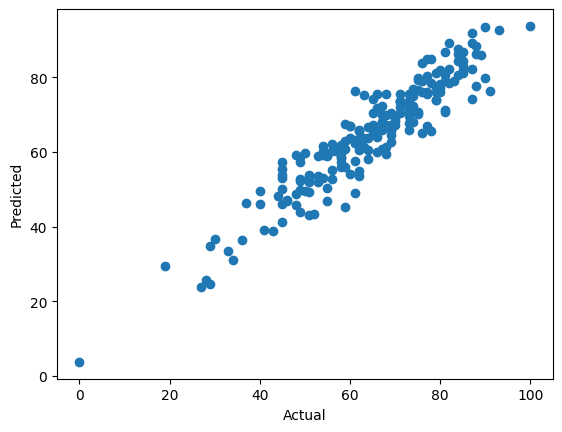

In [47]:
plt.scatter(y_test,y_pred)
plt.xlabel('Actual')
plt.ylabel('Predicted')

<Axes: xlabel='math score'>

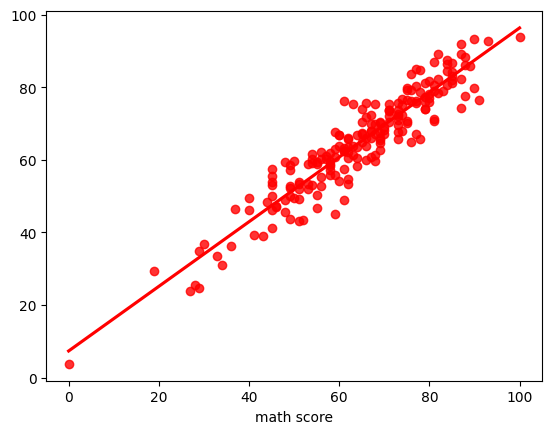

In [48]:
sns.regplot(x=y_test,y=y_pred, ci=None, color='red')